<a href="https://colab.research.google.com/github/RyanLin-101/Qiu-Lab-Research-Internship/blob/main/GeneticSimulation/Population_Allele.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
def mutDistribution(pop_size, pMut, num_Sims):
  muts = []
  for i in range(0, num_Sims):
    count = 0
    pop = np.random.choice(range(0,2),size=pop_size , replace=True, p = [pMut,1-pMut])
    for y in range(0,pop_size):
      if pop[y] == 0:
        count+=1
    muts.append(count/pop_size)
  return muts

Computes Standard Error of the Sampling Distribution

In [ ]:
def stdErrs(p, n):
  return np.sqrt((p*(1-p))/n)
stdErrs(.6 , 100)

0.04898979485566356

In [ ]:
def stdErr(prob, pop_size):
  d1 = {}
  d1["Type"] = []
  d1["pop_size"] = []
  d1["stdErrs"] = []
  for p in range(2, pop_size):
    d1["pop_size"].append(p)
    d1["stdErrs"].append(stdErrs(prob, p))
    d1["Type"].append("Actual")
  return d1

In [ ]:
def stdErrSim(pop_size, pMut, num_Sims):
  d1 = {}
  d1["Type"] = []
  d1["pop_size"] = []
  d1["stdErrs"] = []
  for p in range(2, pop_size):
    d1["pop_size"].append(p)
    d1["stdErrs"].append(np.std(mutDistribution(p, pMut, num_Sims)))
    d1["Type"].append("Simulation")
  return d1

[Text(0.5, 1.0, 'Standard Errors for Population Sizes pMut = .6'),
 Text(0.5, 0, 'Population Size'),
 Text(0, 0.5, 'Standard Error')]

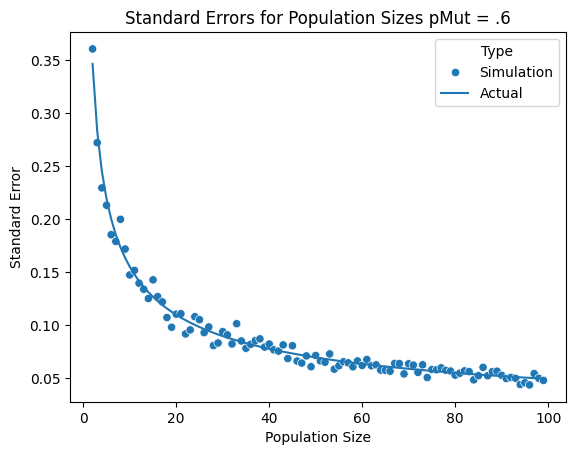

In [ ]:
df1 = pd.DataFrame(stdErr(.6, 100))
df2 = pd.DataFrame(stdErrSim(100, .6, 100))
sns.scatterplot(x= df2["pop_size"], y = df2["stdErrs"], hue = df2["Type"]).set(title="Standard Errors for Population Sizes pMut = .6", xlabel = "Population Size", ylabel = "Standard Error")
sns.lineplot(x= df1["pop_size"], y = df1["stdErrs"], hue = df1["Type"]).set(title="Standard Errors for Population Sizes pMut = .6", xlabel = "Population Size", ylabel = "Standard Error")